# Import

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import RegressorMixin, TransformerMixin
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet, ElasticNetCV

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit

## Data

In [2]:
denver_df = pd.read_csv('../../Data/Clean/combined/Denver_combined.csv')
atlanta_df = pd.read_csv('../../Data/Clean/combined/Atlanta_combined.csv')
charlotte_df = pd.read_csv('../../Data/Clean/combined/Charlotte_combined.csv')
cincinnati_df = pd.read_csv('../../Data/Clean/combined/Cincinnati_combined.csv')
indi_df = pd.read_csv('../../Data/Clean/combined/Indianapolis_combined.csv')
prov_df = pd.read_csv('../../Data/Clean/combined/Providence_combined.csv')
tampa_df = pd.read_csv('../../Data/Clean/combined/Tampa_combined.csv')
total_cities_df = pd.read_csv('../../Data/Clean/combined/all_cities_combined.csv')

In [3]:
denver_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,74.0,34.0,28.0,16733.849533,0.133225,537706.730205,682.0,3169.0,397708.149372,3.482,4.033,0.550
1,2018-02,72.0,31.0,22.0,16423.930620,0.130210,545468.537291,657.0,3395.0,400872.926042,3.785,4.330,0.545
2,2018-03,71.0,30.0,19.0,16012.326935,0.153830,549485.507056,992.0,4766.0,403904.017509,3.910,4.444,0.534
3,2018-04,70.0,31.0,16.0,16674.160324,0.178077,555329.230501,859.0,5045.0,406571.265108,3.925,4.468,0.543
4,2018-05,68.0,32.0,17.0,15617.310131,0.220831,543572.326351,907.0,5812.0,409135.348940,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,74.0,28.0,35.0,17228.124175,0.215376,749677.646739,368.0,2767.0,588450.438544,6.102,6.776,0.674
74,2024-03,72.0,28.0,26.0,18829.755065,0.240464,745504.104784,439.0,3327.0,588917.680727,6.175,6.820,0.645
75,2024-04,68.0,28.0,21.0,19466.333021,0.287527,841958.089514,391.0,3660.0,590109.794947,6.263,6.992,0.730
76,2024-05,62.0,28.0,23.0,18533.910679,0.328747,813332.596257,374.0,4050.0,590809.175996,6.346,7.060,0.714


In [4]:
atlanta_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,35.0,45.0,12315.431363,0.160343,298699.954978,1580.0,6828.0,216365.714317,3.482,4.033,0.550
1,2018-02,52.0,31.0,40.0,13361.053631,0.155572,309807.747078,1885.0,7862.0,218318.581498,3.785,4.330,0.545
2,2018-03,53.0,32.0,35.0,13712.279370,0.170905,325455.767902,2384.0,10600.0,220179.198175,3.910,4.444,0.534
3,2018-04,56.0,32.0,31.0,13456.497756,0.185078,324589.131298,1967.0,10883.0,221743.705815,3.925,4.468,0.543
4,2018-05,57.0,33.0,30.0,13292.195069,0.214794,338943.512924,1977.0,12512.0,223227.417852,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,59.0,25.0,50.0,13899.210736,0.225485,519554.348501,967.0,5786.0,382993.972281,6.102,6.776,0.674
74,2024-03,57.0,25.0,41.0,15359.677683,0.235984,535044.050216,1155.0,7173.0,384542.454662,6.175,6.820,0.645
75,2024-04,55.0,25.0,41.0,14769.656859,0.254714,550809.895717,1074.0,7872.0,386333.204575,6.263,6.992,0.730
76,2024-05,51.0,25.0,40.0,15102.343887,0.279234,531427.160115,1043.0,8275.0,387488.071665,6.346,7.060,0.714


In [5]:
charlotte_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,40.0,40.0,11243.116613,0.143878,331002.751220,700.0,2988.0,214397.286147,3.482,4.033,0.550
1,2018-02,52.0,36.0,35.0,12605.449194,0.156792,321081.860710,761.0,3131.0,216017.822527,3.785,4.330,0.545
2,2018-03,53.0,34.0,30.0,12760.508333,0.168021,334866.760000,954.0,4302.0,217678.457946,3.910,4.444,0.534
3,2018-04,54.0,36.0,27.0,13261.422895,0.191695,354226.079731,932.0,4395.0,218995.506605,3.925,4.468,0.543
4,2018-05,54.0,37.0,28.0,12713.534753,0.219585,363532.372678,917.0,4977.0,220144.546519,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,64.0,33.0,40.0,14916.349080,0.197018,497521.199678,621.0,2555.0,380362.214298,6.102,6.776,0.674
74,2024-03,62.0,32.0,31.0,15022.786413,0.202432,493570.787020,782.0,3084.0,382371.348508,6.175,6.820,0.645
75,2024-04,59.0,33.0,29.0,15763.411191,0.226194,578415.705361,720.0,3377.0,384493.452328,6.263,6.992,0.730
76,2024-05,55.0,33.0,28.0,15643.516741,0.248292,525051.873000,730.0,3732.0,386114.169028,6.346,7.060,0.714


In [6]:
cincinnati_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,42.0,39.0,49.0,8892.789676,0.188391,277393.789308,321.0,1979.0,173346.496800,3.482,4.033,0.550
1,2018-02,43.0,37.0,44.0,9781.125106,0.170206,269154.079051,254.0,1948.0,174075.384919,3.785,4.330,0.545
2,2018-03,46.0,35.0,35.0,9846.737418,0.178320,315383.311005,210.0,2960.0,175200.375854,3.910,4.444,0.534
3,2018-04,50.0,37.0,32.0,11134.855937,0.201177,269780.945055,182.0,3173.0,176430.244009,3.925,4.468,0.543
4,2018-05,51.0,38.0,27.0,11504.665660,0.217566,291332.251613,155.0,3506.0,177773.394767,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,71.0,31.0,29.0,13009.215712,0.190844,452102.839286,112.0,1675.0,281327.059832,6.102,6.776,0.674
74,2024-03,72.0,30.0,18.0,14352.024752,0.192933,477956.933884,121.0,2166.0,283198.390034,6.175,6.820,0.645
75,2024-04,71.0,33.0,17.0,14308.300714,0.211427,495735.892473,93.0,2452.0,285301.781194,6.263,6.992,0.730
76,2024-05,68.0,31.0,17.0,16067.106364,0.219744,488512.203540,113.0,2800.0,287108.719823,6.346,7.060,0.714


In [7]:
indi_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,44.0,31.0,50.0,9565.188841,0.165976,297822.061594,276.0,2284.0,163700.591608,3.482,4.033,0.550
1,2018-02,44.0,29.0,48.0,9187.455993,0.147806,320292.490323,317.0,2459.0,164520.933841,3.785,4.330,0.545
2,2018-03,50.0,28.0,40.0,9530.067247,0.154958,333248.685714,315.0,3118.0,165635.755273,3.910,4.444,0.534
3,2018-04,58.0,29.0,36.0,9858.027416,0.173512,363757.471774,249.0,3529.0,166888.280898,3.925,4.468,0.543
4,2018-05,61.0,36.0,25.0,10074.075684,0.221585,346813.219178,221.0,4005.0,168294.331977,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,59.0,31.0,39.0,10385.392580,0.217330,422515.811321,265.0,1883.0,278403.822057,6.102,6.776,0.674
74,2024-03,63.0,30.0,30.0,10906.364243,0.224555,412844.724852,338.0,2315.0,280072.846543,6.175,6.820,0.645
75,2024-04,63.0,32.0,24.0,11099.637136,0.262937,463492.180602,299.0,2613.0,281725.569422,6.263,6.992,0.730
76,2024-05,60.0,32.0,23.0,11084.267803,0.278793,458284.296407,334.0,2784.0,282983.774843,6.346,7.060,0.714


In [8]:
prov_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,52.0,44.0,59.0,14886.916910,0.135527,357332.586667,75.0,1335.0,294646.210320,3.482,4.033,0.550
1,2018-02,53.0,45.0,49.0,13721.127660,0.122285,383405.906250,64.0,1087.0,295883.910233,3.785,4.330,0.545
2,2018-03,58.0,43.0,46.0,17894.740573,0.118579,372595.388889,90.0,1419.0,297498.840973,3.910,4.444,0.534
3,2018-04,61.0,41.0,41.0,18644.291850,0.142316,390282.752688,93.0,1565.0,299255.564948,3.925,4.468,0.543
4,2018-05,61.0,42.0,33.0,15307.745888,0.163512,409967.413548,93.0,1995.0,301115.602682,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,88.0,38.0,32.0,23931.484733,0.131908,649340.590164,61.0,783.0,472864.457919,6.102,6.776,0.674
74,2024-03,90.0,39.0,24.0,25013.469231,0.120216,623441.736111,72.0,936.0,475661.156810,6.175,6.820,0.645
75,2024-04,86.0,40.0,22.0,35586.269592,0.129004,579557.679487,78.0,1015.0,479773.292312,6.263,6.992,0.730
76,2024-05,80.0,40.0,19.0,34809.830435,0.154261,662960.586032,63.0,1181.0,484040.823678,6.346,7.060,0.714


# Compare

### Practice

/var/folders/1p/hmyd3xfx6nv8ycr1spb94r280000gn/T/ipykernel_72062/3269966885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
/var/folders/1p/hmyd3xfx6nv8ycr1spb94r280000gn/T/ipykernel_72062/3269966885.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


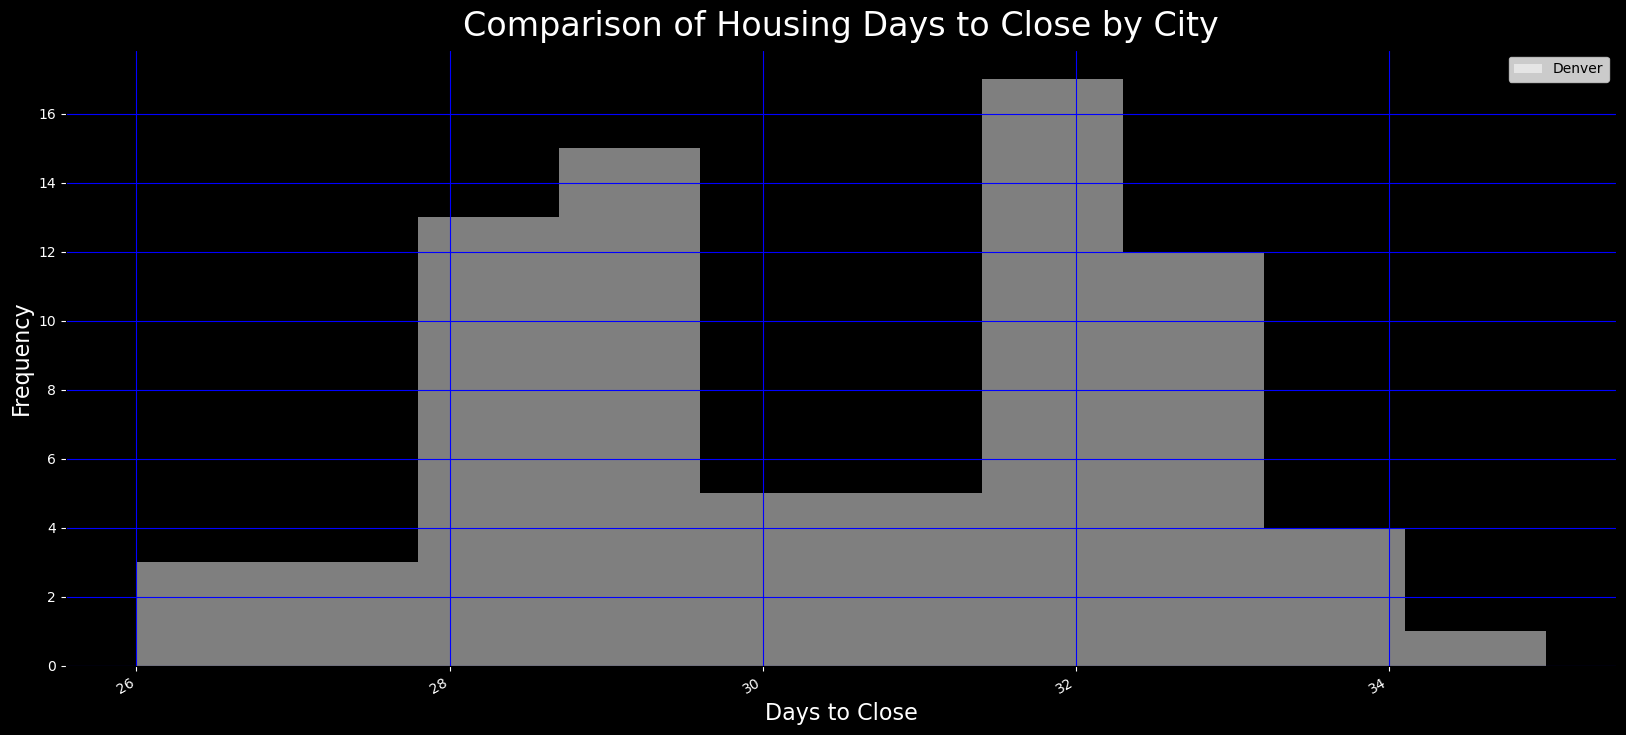

In [9]:
img, ax = plt.subplots(figsize=(20, 8))

# Histogram for Denver
plt.hist(denver_df['DaysToClose'], bins=10, alpha=0.5, label='Denver', color='#FFFFFF')

# Setting labels, title, and grid
plt.xlabel('Days to Close', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Comparison of Housing Days to Close by City', fontsize=24, pad=10)
plt.legend(loc='best')
plt.grid(True, color='blue')

# Update axes to cleaner labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#Adjust style values to match dark theme
img.patch.set_facecolor('black')
ax.set_facecolor('black')

#Adjust style values to match dark theme
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Create output
plt.show()

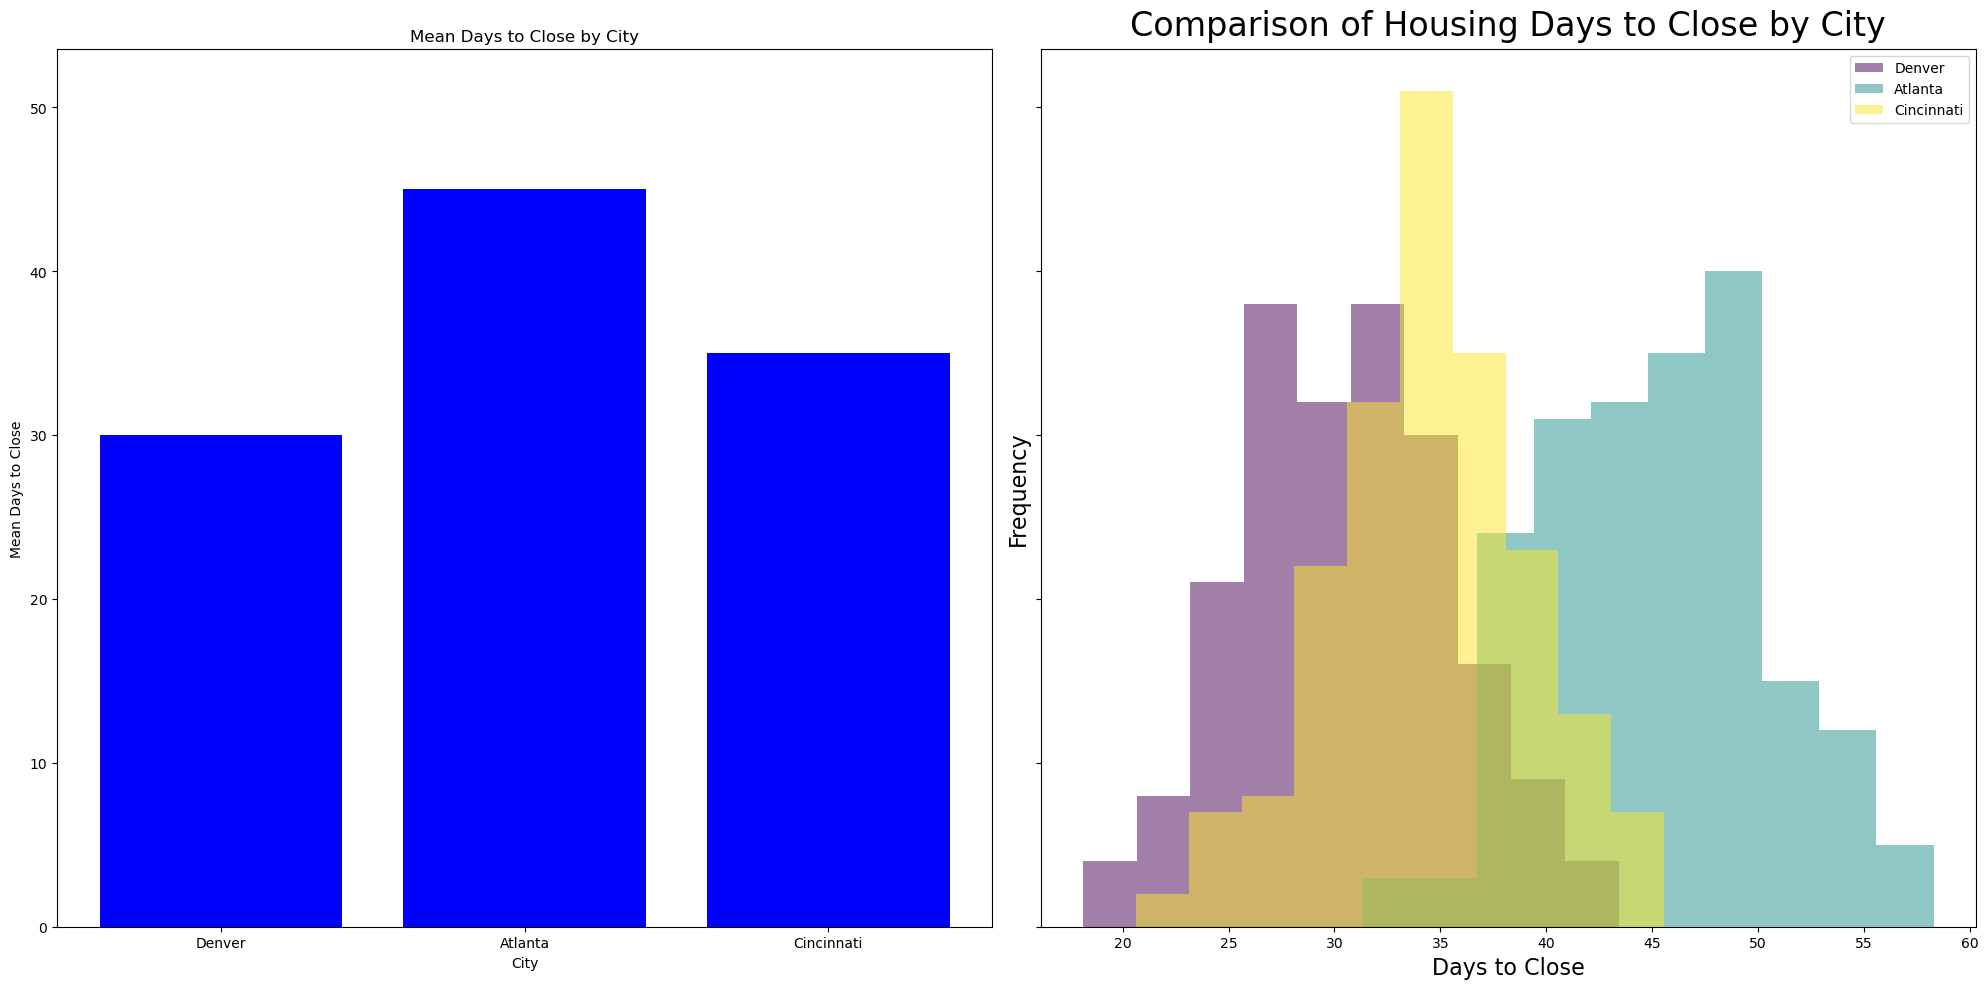

In [10]:
# Example DataFrame for three cities
data = {
    'Denver': np.random.normal(loc=30, scale=5, size=200),
    'Atlanta': np.random.normal(loc=45, scale=5, size=200),
    'Cincinnati': np.random.normal(loc=35, scale=5, size=200)
}

# Define the figure and the layout
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Bar chart for Mean Days to Close
city_data = {'City': ['Denver', 'Atlanta', 'Cincinnati'],
             'MeanDaysToClose': [30, 45, 35]}
city_df = pd.DataFrame(city_data)

axes[0].bar(city_df['City'], city_df['MeanDaysToClose'], color='blue')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Mean Days to Close')
axes[0].set_title('Mean Days to Close by City')

# Histograms for each city with colormap
n_bins = 10
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

for (city, values), color in zip(data.items(), colors):
    n, bins, patches = axes[1].hist(values, bins=n_bins, alpha=0.5, label=city, color=color)
    for patch in patches:
        patch.set_facecolor(color)

axes[1].set_xlabel('Days to Close', fontsize=16)
axes[1].set_ylabel('Frequency', fontsize=16)
axes[1].set_title('Comparison of Housing Days to Close by City', fontsize=24, pad=10)
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


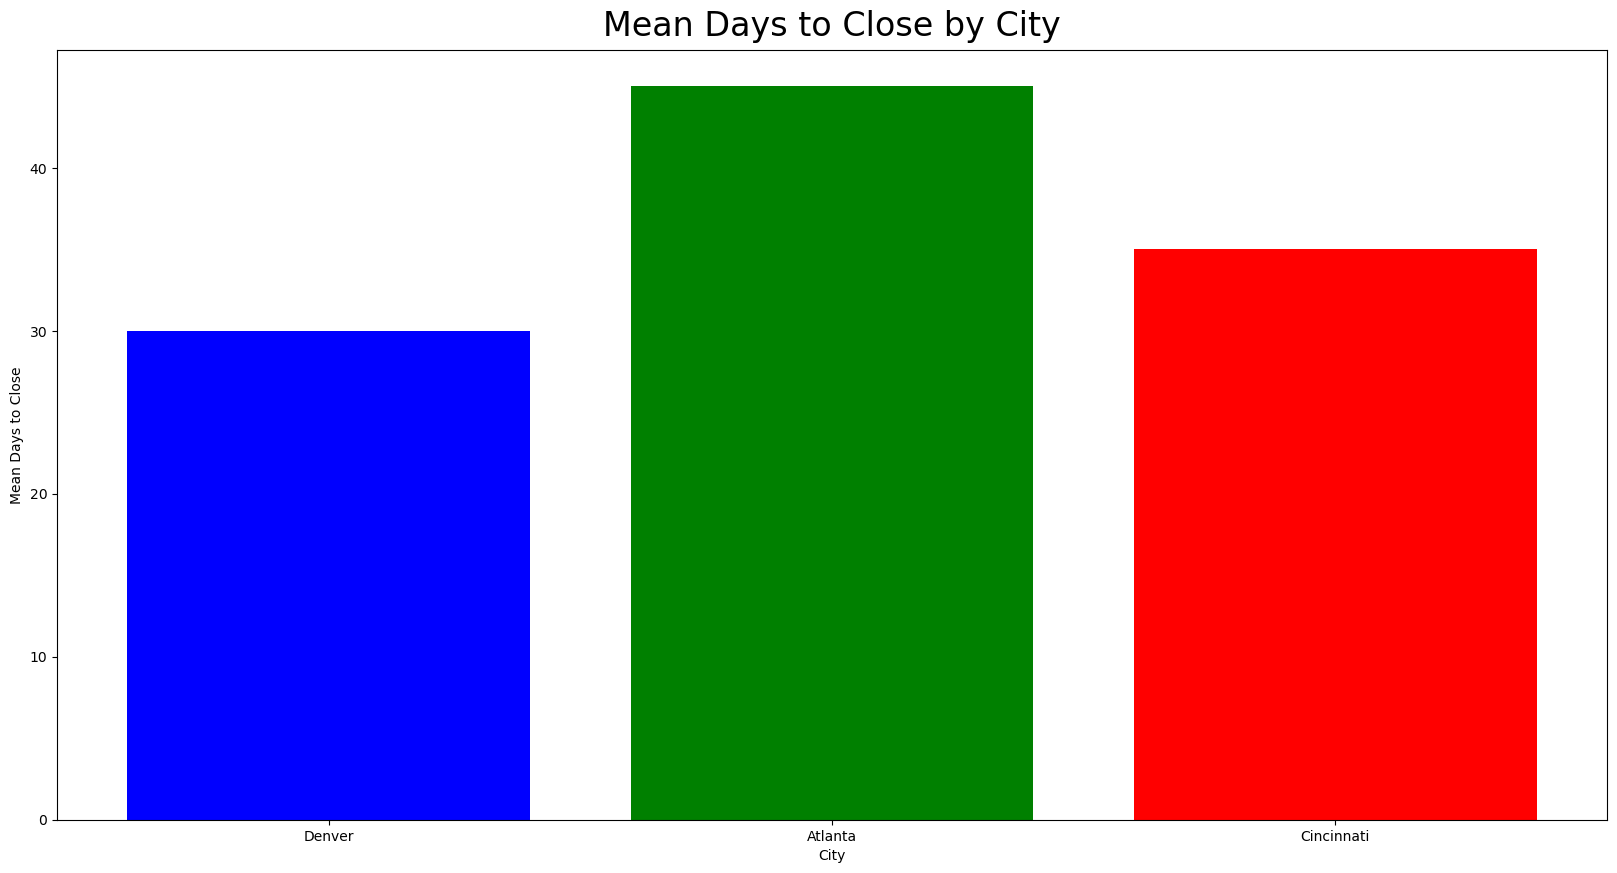

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame structure
city_data = {
    'City': ['Denver', 'Atlanta', 'Cincinnati'],
    'MeanDaysToClose': [30, 45, 35]
}
city_df = pd.DataFrame(city_data)

# Define figure size
plt.figure(figsize=(20, 10))

# Colors for each city
colors = ['blue', 'green', 'red']

# Creating a bar chart with individual colors
plt.bar(city_df['City'], city_df['MeanDaysToClose'], color=colors)

# Set labels and title with customization
plt.xlabel('City')
plt.ylabel('Mean Days to Close')
plt.title('Mean Days to Close by City', fontsize=24, pad=10)

# Display the plot
plt.show()


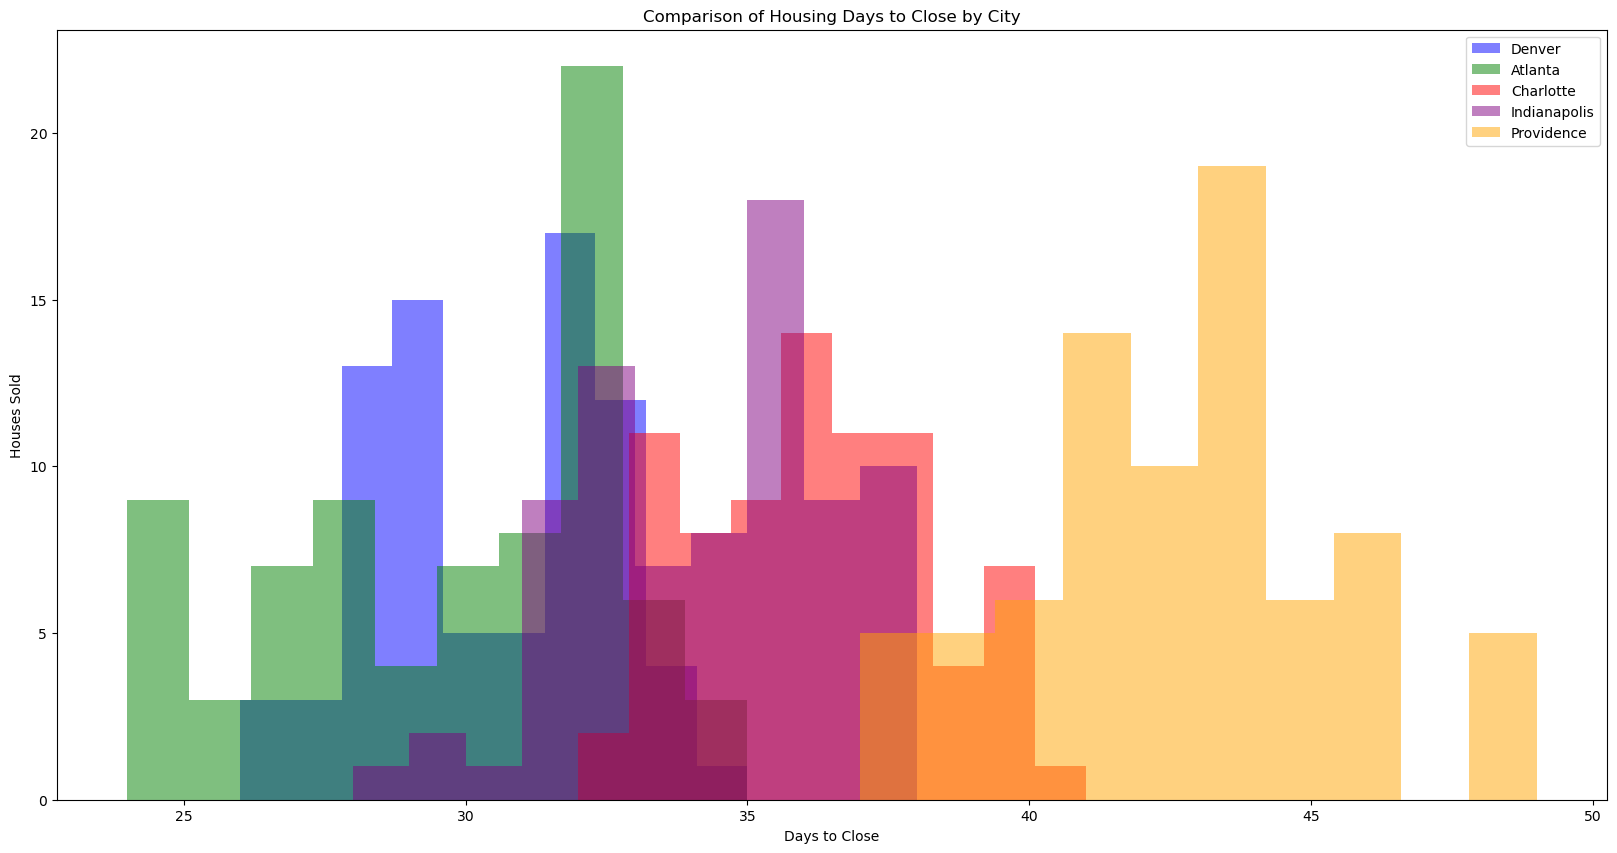

In [12]:
plt.figure(figsize=(20, 10))

# Histogram for Denver
plt.hist(denver_df['DaysToClose'], bins=10, alpha=0.5, label='Denver', color='blue')

# Histogram for Atlanta
plt.hist(atlanta_df['DaysToClose'], bins=10, alpha=0.5, label='Atlanta', color='green')

# Histogram for Charlotte
plt.hist(charlotte_df['DaysToClose'], bins=10, alpha=0.5, label='Charlotte', color='red')

# Histogram for Indianpolis
plt.hist(indi_df['DaysToClose'], bins=10, alpha=0.5, label='Indianapolis', color='purple')

# Histogram for Providence
plt.hist(prov_df['DaysToClose'], bins=10, alpha=0.5, label='Providence', color='orange')

plt.xlabel('Days to Close')
plt.ylabel('Houses Sold')
plt.title('Comparison of Housing Days to Close by City')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [13]:
""" 
Histogram not describing what I want it to — need to find means to simplify graphic 
"""

' \nHistogram not describing what I want it to — need to find means to simplify graphic \n'

In [14]:
# from tkinter import *
# from tkinter.ttk import *
# import matplotlib
# matplotlib.use("TkAgg")
# from matplotlib.figure import Figure 
# # OO backend (Tkinter) tkagg() function:
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# root = Tk()
# figure = Figure(figsize=(5, 4), dpi=100)
# plot = figure.add_subplot(1, 1, 1)
# x = [ 0.1, 0.2, 0.3, 0.4 ]
# y = [ -0.1, -0.2, -0.3, -0.4 ]
# plot.plot(x, y, color="red", marker="o",  linestyle="--")
# canvas = FigureCanvasTkAgg(figure, root)
# canvas.get_tk_widget().grid(row=0, column=0)
# root.mainloop()

### Cities by Feature

In [15]:
combined_cities_dict = {
    'Denver': denver_df,
    'Atlanta': atlanta_df,
    'Charlotte': charlotte_df,
    'Cincinnati': cincinnati_df,
    'Indianapolis': indi_df,
    'Providence': prov_df
}

display(combined_cities_dict)

{'Denver':        DATE  MarketTempIdx  DaysToClose  DaysOnZillow  ListingPriceCutAmt  \
 0   2018-01           74.0         34.0          28.0        16733.849533   
 1   2018-02           72.0         31.0          22.0        16423.930620   
 2   2018-03           71.0         30.0          19.0        16012.326935   
 3   2018-04           70.0         31.0          16.0        16674.160324   
 4   2018-05           68.0         32.0          17.0        15617.310131   
 ..      ...            ...          ...           ...                 ...   
 73  2024-02           74.0         28.0          35.0        17228.124175   
 74  2024-03           72.0         28.0          26.0        18829.755065   
 75  2024-04           68.0         28.0          21.0        19466.333021   
 76  2024-05           62.0         28.0          23.0        18533.910679   
 77  2024-06           56.0         29.0          27.0        19201.708713   
 
     ListingPriceCutPct  NewConstructMeanSalePrice  

In [16]:
mean_days_to_close = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    mean_days_to_close[city] = df['DaysToClose'].mean()

# convert to df
mean_days_to_close_df = pd.DataFrame(list(mean_days_to_close.items()), columns=['City', 'MeanDaysToClose'])

print(mean_days_to_close_df)

# # Highlight the Min values in each column 
# print("\nModified Stlying DataFrame:")
# df.style.highlight_min(axis=0)

           City  MeanDaysToClose
0        Denver        30.435897
1       Atlanta        29.769231
2     Charlotte        36.153846
3    Cincinnati        35.487179
4  Indianapolis        33.846154
5    Providence        42.551282


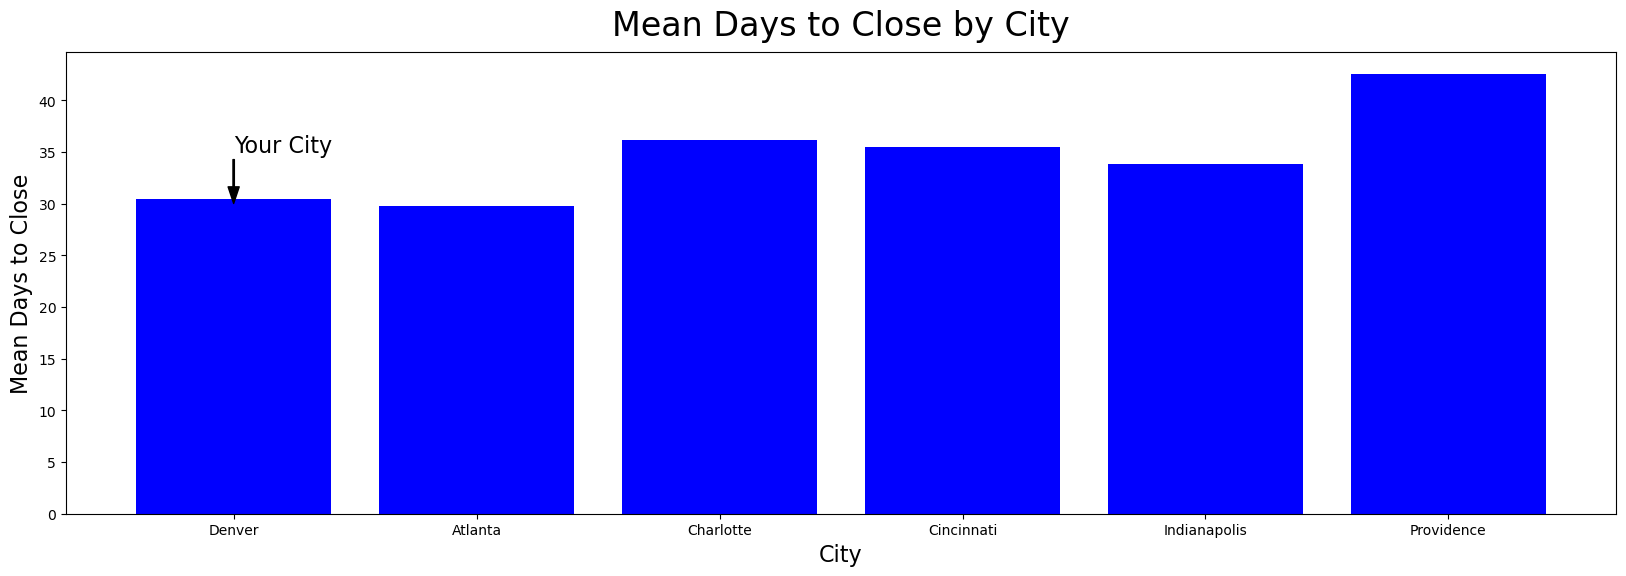

<Figure size 640x480 with 0 Axes>

In [17]:
mean_days_to_close_df = pd.DataFrame(list(mean_days_to_close.items()), columns=['City', 'MeanDaysToClose'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(mean_days_to_close_df['City'], mean_days_to_close_df['MeanDaysToClose'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Mean Days to Close', fontsize=16)
plt.title('Mean Days to Close by City', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 30), xytext=('Denver', 35), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('dtc_compare.png') 

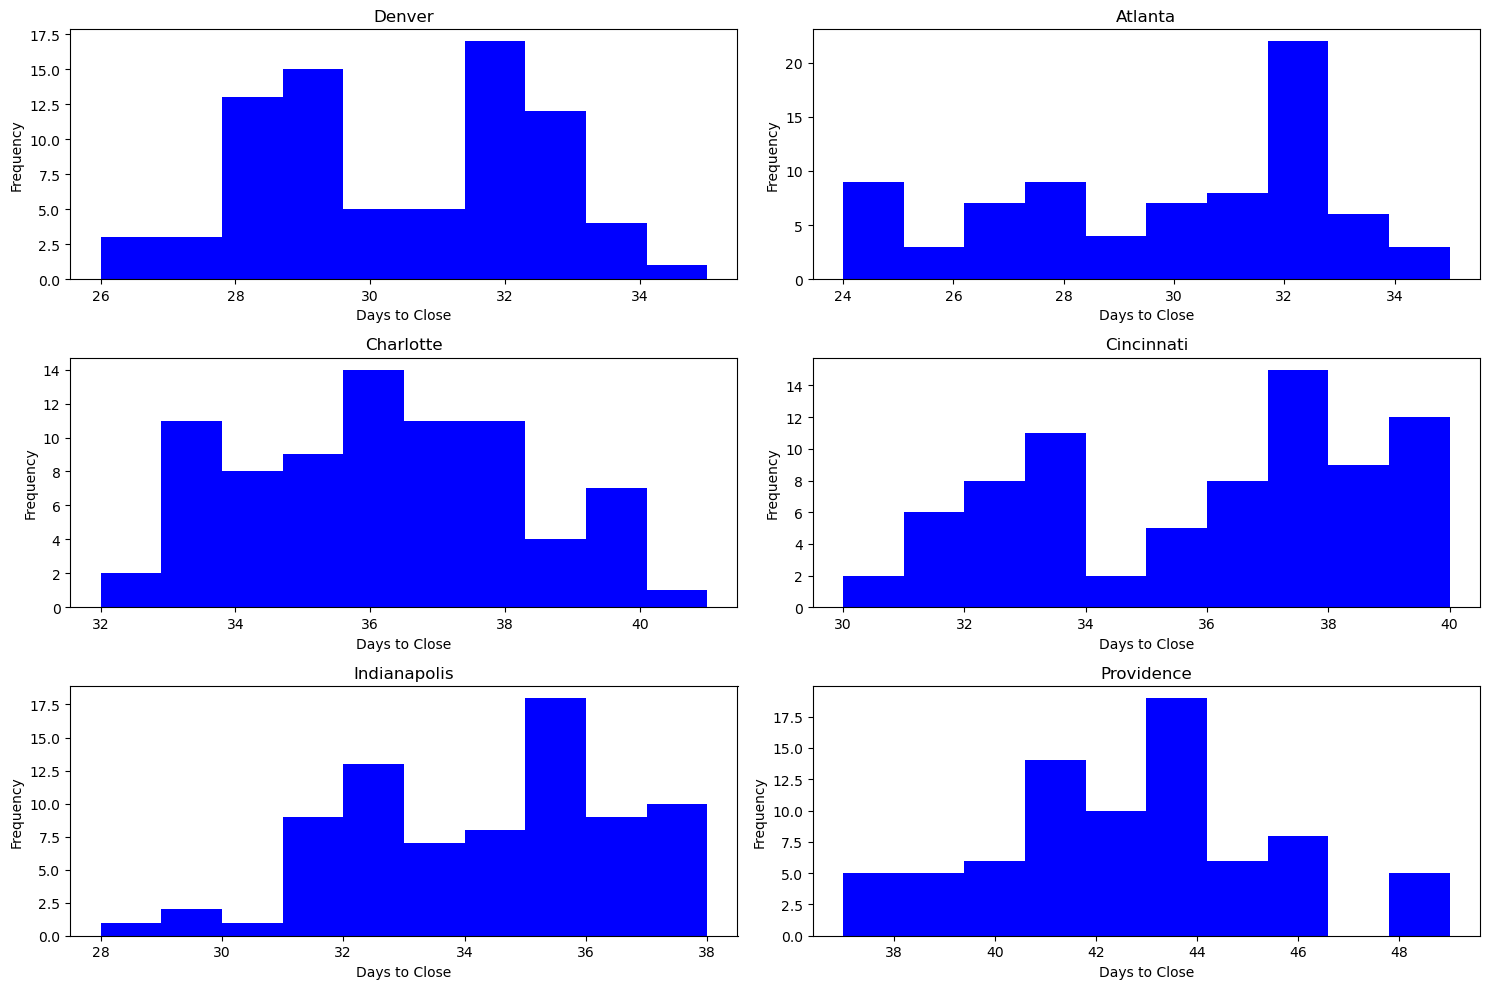

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, (city, df) in zip(axes, combined_cities_dict.items()):
    ax.hist(df['DaysToClose'], bins=10, color='blue')
    ax.set_title(f'{city}')
    ax.set_xlabel('Days to Close')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
sales_count = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    sales_count[city] = df['SalesCount'].mean()

# convert to df
sales_count_df = pd.DataFrame(list(sales_count.items()), columns=['City', 'SalesCount'])

print(sales_count_df)

           City   SalesCount
0        Denver  4314.294872
1       Atlanta  9848.192308
2     Charlotte  4195.038462
3    Cincinnati  2866.909091
4  Indianapolis  3153.051282
5    Providence  1594.435897


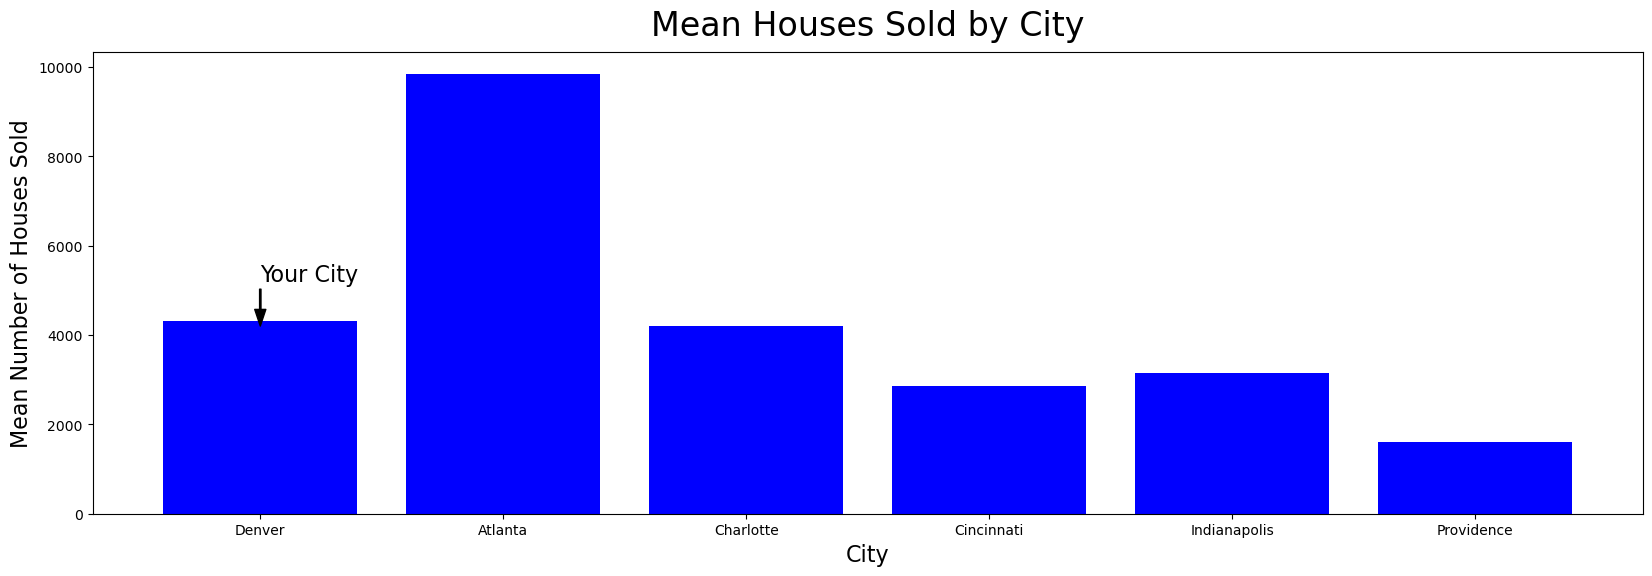

<Figure size 640x480 with 0 Axes>

In [20]:
sales_count_df = pd.DataFrame(list(sales_count.items()), columns=['City', 'SalesCount'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(sales_count_df['City'], sales_count_df['SalesCount'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Mean Number of Houses Sold', fontsize=16)
plt.title('Mean Houses Sold by City', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 4200), xytext=('Denver', 5200), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('../outputs/houses_sold.png')

In [21]:
market_temp_cities = {}

# Loop through each city and its corresponding DataFrame
for city, df in combined_cities_dict.items():
    market_temp_cities[city] = df['MarketTempIdx']

# convert to df
market_temp_cities_df = pd.DataFrame(list(market_temp_cities.items()), columns=['City', 'MarketTempIdx'])

print(market_temp_cities_df)

           City                                      MarketTempIdx
0        Denver  0     74.0
1     72.0
2     71.0
3     70.0
4 ...
1       Atlanta  0     53.0
1     52.0
2     53.0
3     56.0
4 ...
2     Charlotte  0     53.0
1     52.0
2     53.0
3     54.0
4 ...
3    Cincinnati  0     42.0
1     43.0
2     46.0
3     50.0
4 ...
4  Indianapolis  0     44.0
1     44.0
2     50.0
3     58.0
4 ...
5    Providence  0     52.0
1     53.0
2     58.0
3     61.0
4 ...


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (6, 78).

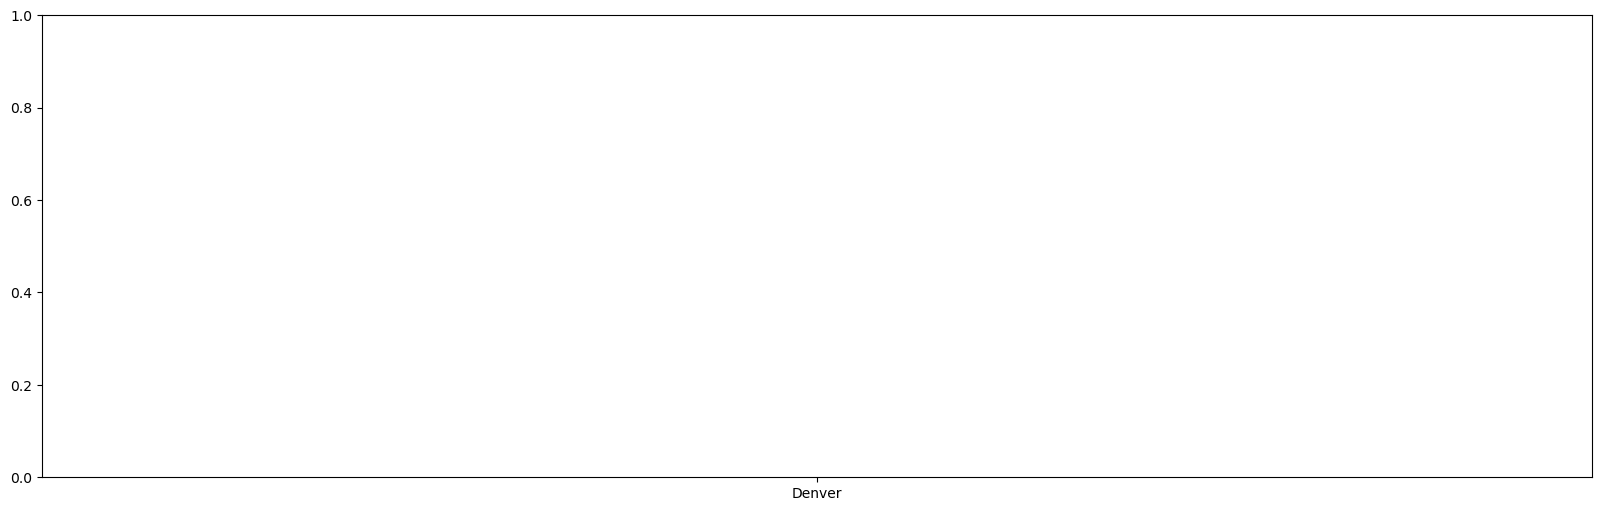

In [22]:
market_temp_cities_df = pd.DataFrame(list(market_temp_cities.items()), columns=['City', 'MarketTempIdx'])

# Creating a bar chart
plt.figure(figsize=(20, 6))
plt.bar(market_temp_cities_df['City'], market_temp_cities_df['MarketTempIdx'], color='blue')
# plt.hist(x=0, bins=10, width=0.5)
plt.xlabel('City', fontsize=16)
plt.ylabel('Market Temperature by City', fontsize=16)
plt.title('Market Temp Index', fontsize=24, pad=12)

# Add annotation
plt.annotate('Your City', xy=('Denver', 100), xytext=('Denver', 120), fontsize=16, arrowprops={'width':1,'headwidth':8,'color':'black'})

# output
plt.show()
plt.savefig('../outputs/houses_sold.png')

# Modeling